## Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
dataset=pd.read_csv('bank.csv',delimiter=';')

In [12]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [13]:
dataset.shape

(4521, 17)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [15]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### Since the data is clean, we don't need to clean the data and we can start with data visualization. 

## Data Visualization and EDA 

### Jobs

In [17]:
dataset.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='count'>

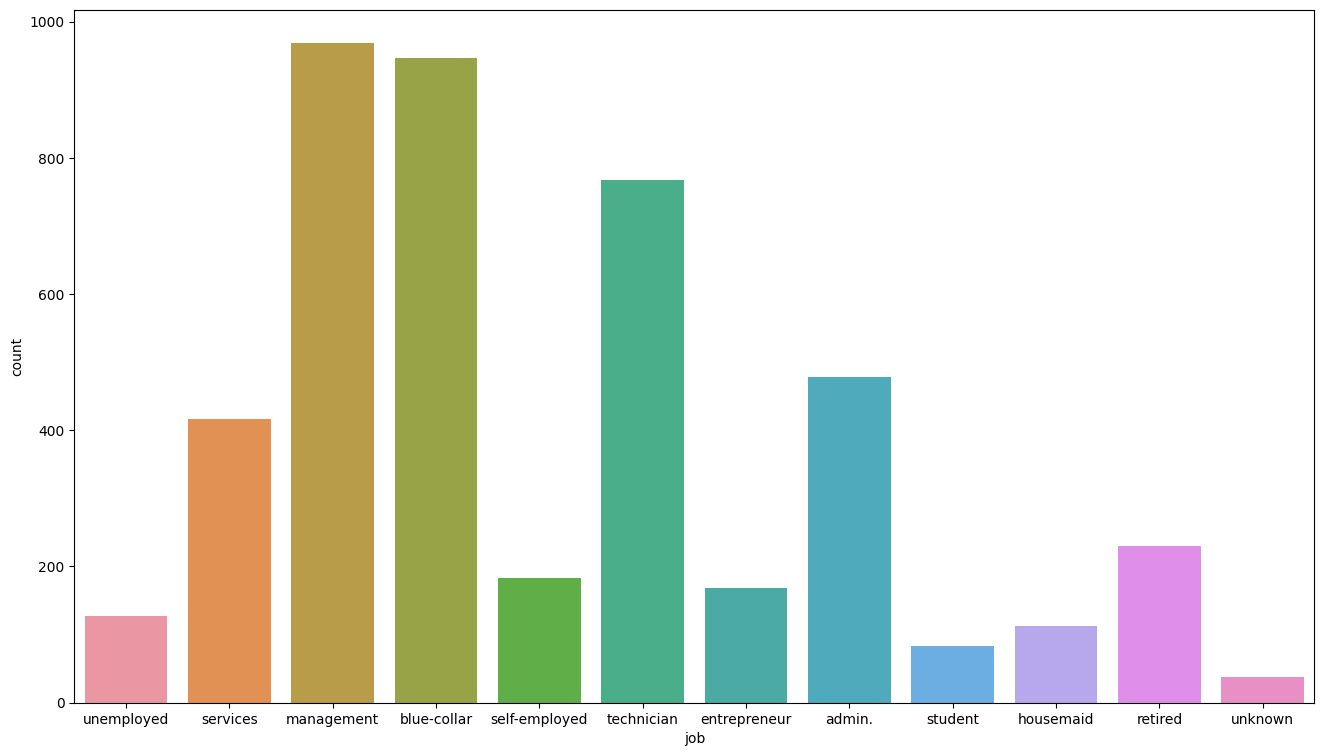

In [18]:
plt.figure(figsize = (16,9))
sns.countplot(x='job',data=dataset)

##### We infer that most of the clients have management or blue-collar job 

### Martial Status 

In [19]:
dataset.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

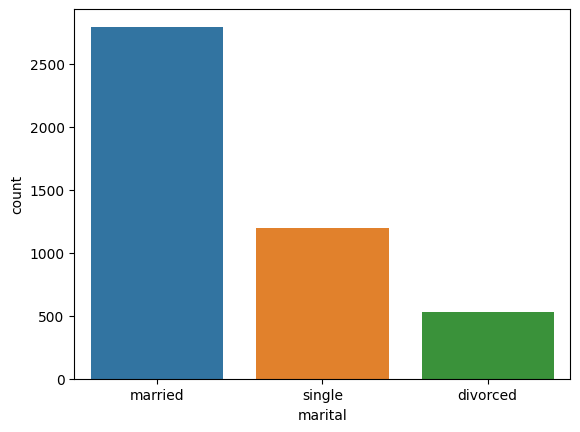

In [20]:
sns.countplot(x='marital',data=dataset)

##### We infer that bank has more married clients than singles and divorcees.

### Education type of client

In [22]:
dataset.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

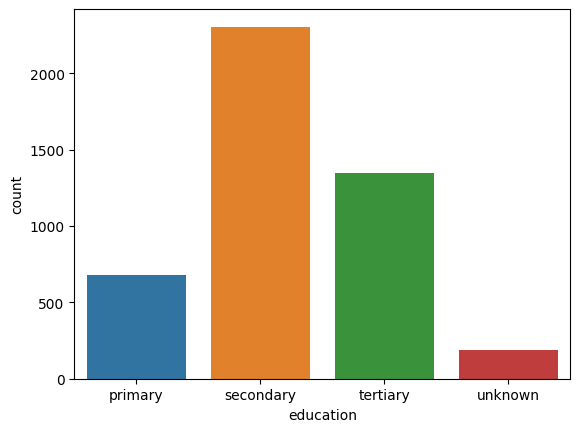

In [23]:
sns.countplot(x='education',data=dataset)

##### We notice the clients majorly have secondary education.

### Client with personal loan

In [26]:
dataset.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

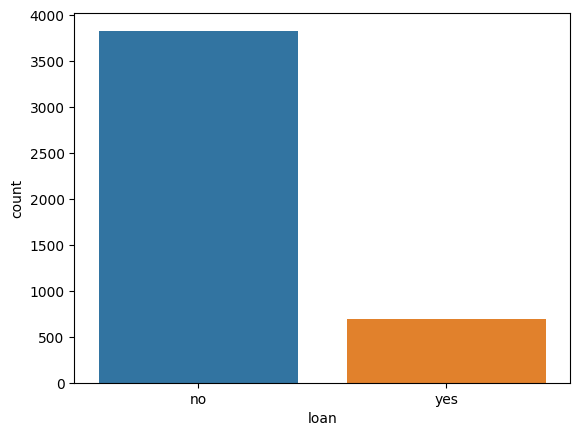

In [27]:
sns.countplot(x='loan',data=dataset)

##### We infer that only 691 people have personal loan, which is around 15% of total clients.

## Client with housing loan


In [29]:
dataset.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

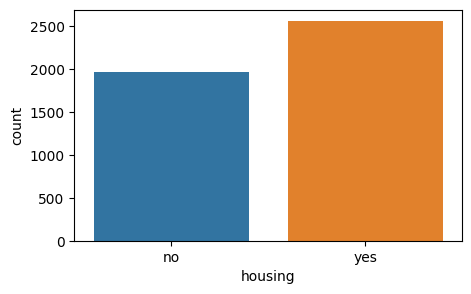

In [30]:
plt.figure(figsize = (5,3))
sns.countplot(x='housing',data=dataset)

#### As observed 2559 people, are having housing loan which is more than 56% of total clients.

### Campaign 

In [32]:
dataset.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
19       3
20       3
28       3
24       3
32       2
21       2
23       2
22       2
31       1
29       1
50       1
30       1
44       1
Name: campaign, dtype: int64

<Axes: xlabel='campaign', ylabel='count'>

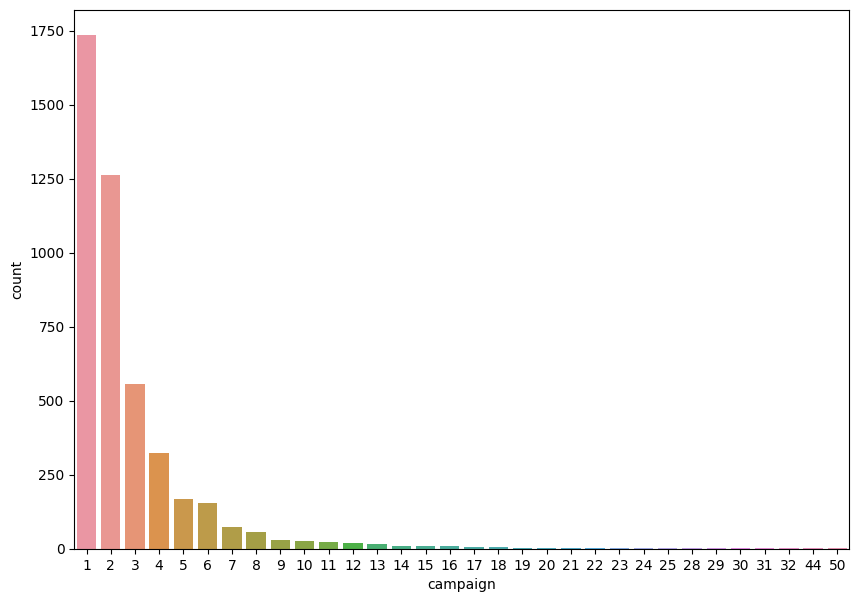

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x='campaign',data=dataset)

### Age distribution within the dataset 

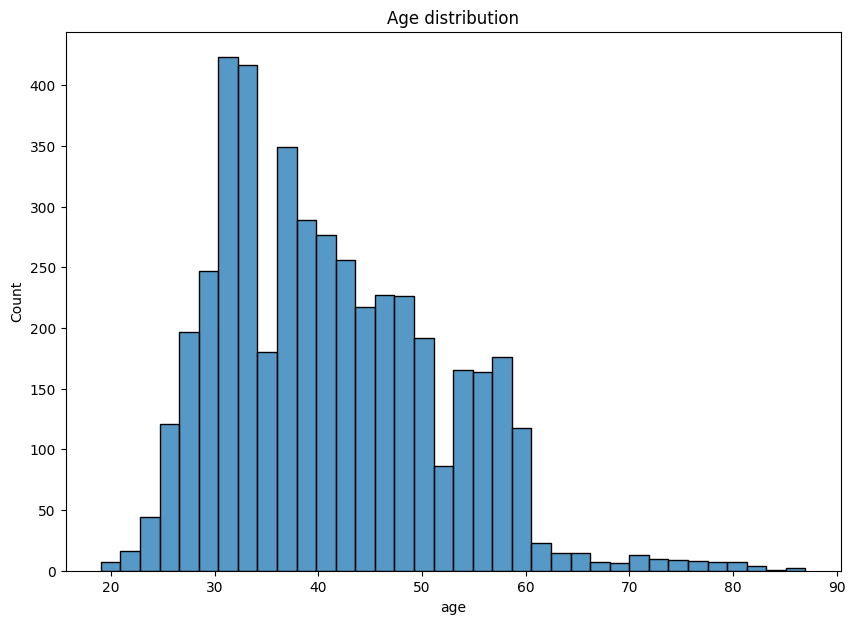

In [34]:
plt.figure(figsize=(10,7))
sns.histplot(dataset['age'])
plt.title("Age distribution")
plt.show()

## Data Manipulation

#### Determining income group of clients using bank balance
####  Income groups will be divided into 3 viz. low,mid and high
####   low income group is lesser than 500
####  mid income group lies between 501 to 1500
####  high income group is greater than 1501

In [35]:
dataset['Income_group']=pd.cut(dataset['balance'],bins=[-15000,500,1500,72000],labels=['Low','Mid','High'])

In [37]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Income_group
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,High
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,High
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Mid
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Mid
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Low


<Axes: xlabel='Income_group', ylabel='count'>

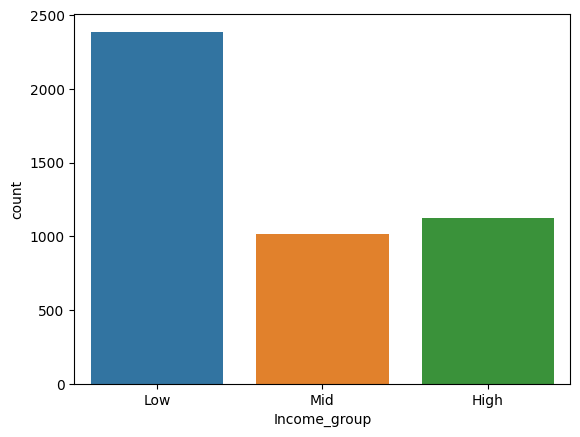

In [38]:
sns.countplot(x='Income_group',data=dataset)

#### From above graph we understand, that around 53% population fall under 'Low Income group', 22% under 'Mid Income group' and 25% under 'Higher Income group' respectively. 

## Data Cleaning 

In [40]:
dataset.drop(['pdays','previous','poutcome','y','Income_group'],axis=1 , inplace=True)

In [48]:
le=LabelEncoder()
dataset["job"] = le.fit_transform(dataset["job"])
dataset["marital"] = le.fit_transform(dataset["marital"])
dataset["education"] = le.fit_transform(dataset["education"])
dataset["default"] = le.fit_transform(dataset["default"])
dataset["contact"] = le.fit_transform(dataset["contact"])
dataset["month"] = le.fit_transform(dataset["month"])
dataset["loan"] = le.fit_transform(dataset["loan"])
dataset["housing"]=le.fit_transform(dataset["housing"])

In [49]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,30,10,1,0,0,1787,0,0,0,19,10,79,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4
4,59,1,1,1,0,0,1,0,2,5,8,226,1


In [50]:
x=dataset.drop('default',axis=1)
y=dataset['default']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Decision Tree Classifier 

In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
dtc_pred=dtc.predict(x_test)

In [55]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       884
           1       0.05      0.05      0.05        21

    accuracy                           0.96       905
   macro avg       0.52      0.51      0.51       905
weighted avg       0.96      0.96      0.96       905



In [56]:
score=round(dtc.score(x_train,y_train)*100,2)
print("Accuracy Score:",round(score,2,),"%")

Accuracy Score: 100.0 %


In [57]:
cm = confusion_matrix(dtc_pred,y_test)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[866  20]
 [ 18   1]]


##### This shows that the decision Tree classifier gives a very good percentage of accuracy